# 单变量分析绘图

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats,integrate

import seaborn as sns

In [3]:
sns.set(color_codes = True)
np.random.seed(sum(map(ord,'distributions')))


查看数据的特征

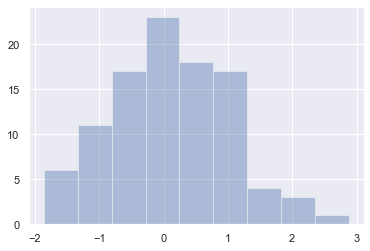

In [5]:
# 随机生成高斯数据：np.random.narmal()
x = np.random.normal(size = 100)

# 将当前的数据画直方图：sns.distplot(当前的数据变量名，kde：表示是否做和密度估计：为False,先不做和密度估计),
sns.distplot(x,kde = False)

例子：
-  利用kdeplot探索某大学学生消费习惯于助学金获得关系

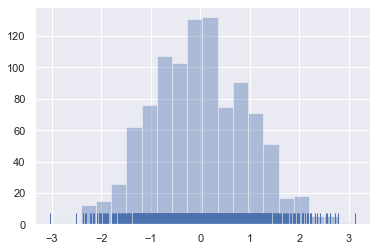

In [19]:
# 指定bins（ 代表将当前的坐标轴等分的切分成多少小块）的宽度，更详细的查看该特征的变换情况
#  kde = False，关闭核密度分布，
# 核密度：对数据分布不附加任何假定，是一种从数据样本本身出发研究数据分布特征的方法
# rug = True, 在x轴上每个观测上生成的小细条（边际毛毯）： 表示数据的分布

sns.distplot(x,bins = 20,kde = False,rug = True)

笔记：

- 第一点：查看数据分布情况: 查看数据整体的轮廓，总体趋势

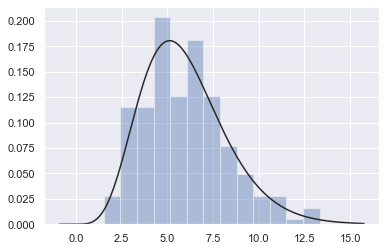

In [7]:
# fit 拟合参数分布，利用distplot() 把数据拟合成参数分布的图形，
#并且观察他们之间的差距，在运用fit来进行参数控制

# 生成gamma分布的数据
x = np.random.gamma(6,size = 200)
# fit 拟合   可以传进来，当前统计的指标
sns.distplot(x,kde = False,fit = stats.gamma)

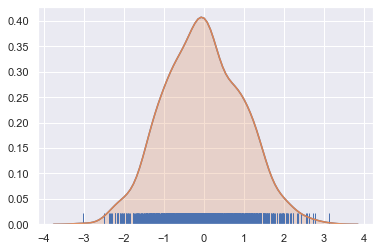

In [21]:
# 关闭直方图，开启rug 细条
sns.distplot(x,hist = False,rug = True)

# kdeplot() 函数：shade 控制阴影,默认开启rug,细条
sns.kdeplot(x,shade = True)

笔记：
- 第一点：根据均值和协方差生成数据
- 第二点： 查看x,y 特征之间的关系，（特征内部的关系）：最好用散点图，单特征用直方图

In [12]:
mean,cov = [0,1],[(1,.5),(.5,1)]
data = np.random.multivariate_normal(mean,cov,200)

# 将数据转化成PD.DataFrame 格式
df = pd.DataFrame(data,columns = ['x','y'])
df.head()

,x,y
0,-0.199838,1.321221
1,-0.576781,1.325008
2,-0.583069,-0.445855
3,-0.128723,1.416834
4,1.167202,3.102316


笔记：
- 第一点:观测两个变量之间的分布关系最好用散点图

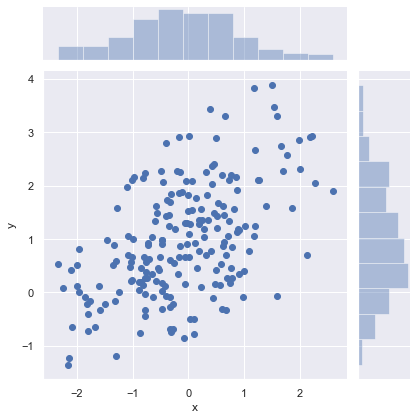

In [9]:
# 同时可以画出散点图和各自的特征图：直方图jointplot()

sns.jointplot(x = 'x',y = 'y',data = df)

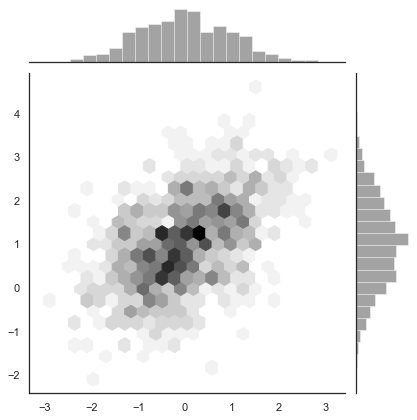

In [15]:
# 用另一种风格，将分布较多的点的区域的颜色，用重颜色表示出来

# 构造数据：较多,random是numpy 中的模块，DataFrame() 是pandas中的模块
x, y = np.random.multivariate_normal(mean,cov,1000).T

# 用with打开画图的风格“white”: 黑白相间的,Hex 图
with sns.axes_style("white"):
    sns.jointplot(x = x,y = y,kind = "hex",color = 'k')

# Seaborn笔记：
- 第一点：能高度兼容numpy与pandas数据结构以及scipy与statsmodels等统计模式
- 第二点：
  特点： 
     基于matplotlib aesthetics绘图风格，增加了一些绘图模式

     增加调色板功能，利用色彩丰富的图像揭示您数据中的模式

     运用数据子集绘制与比较单变量和双变量分布的功能

     运用聚类算法可视化矩阵数据

     灵活运用处理时间序列数据

     利用网格建立复杂图像集
     
- 第三点：
     seaborn的displot()集合了matplotlib的hist()函数与核函数估计kdeplot()的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布。
     具体用法如下：
     a: 代表数据,一维数组or list，
     bins :代表将坐标轴均分成多少段，矩形图的数量
     hist：为True,代表着画的是直方图,控制是否显示条形图，默认为True,
     kde:核密度估计参数，直接利用数据 ，没有涉及假设，使分析准确性较高，控制是否显示核密度估计图
     rug:控制是否显示观测的小细条（边际毛毯）
     fit:控制拟合的参数分布图形
    seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
   
- 第四点：直方图又称质量分布图 ，是一种统计报告图，欧一系列高度不等的纵向条纹红线段标识数据分布的情况。一般用横轴表示数据类型，纵轴标表示分布情况

总结例子：

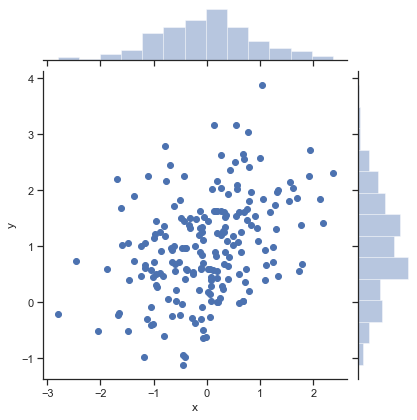

In [26]:
#  1.jointplot，kind参数默认——散点图

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

mean, cov = [0, 1], [(1, .5), (.5, 1)] 
#两个相关的正态分布
data = np.random.multivariate_normal(mean, cov, 200) 
#依据指定的均值和协方差生成数据,生成二维数组
df = pd.DataFrame(data, columns=["x", "y"])

with sns.axes_style("ticks"):
    sns.jointplot(x="x", y="y", data=df)

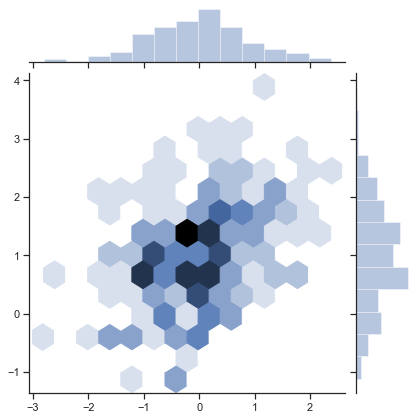

In [25]:
#  2.jointplot，kind=’hex’——六角箱图

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

x, y = np.random.multivariate_normal(mean, cov, 200).T
with sns.axes_style("ticks"):
    sns.jointplot(x=x, y=y, kind="hex")

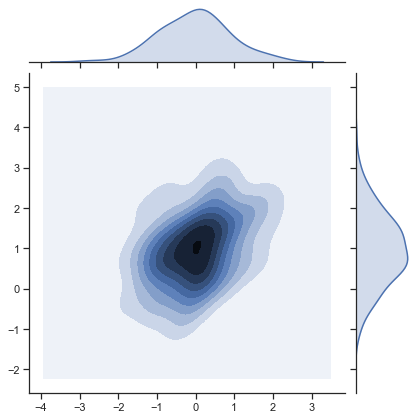

In [24]:
#    3.jointplot，kind=’kde’——核密度估计图

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

x, y = np.random.multivariate_normal(mean, cov, 200).T
with sns.axes_style("ticks"):
    sns.jointplot(x=x, y=y, kind="kde")

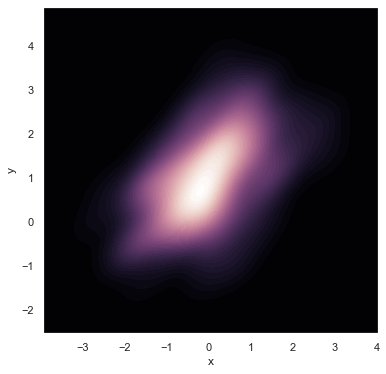

In [23]:
### 4.cubehelix_palette，梦幻效果

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

x, y = np.random.multivariate_normal(mean, cov, 200).T

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

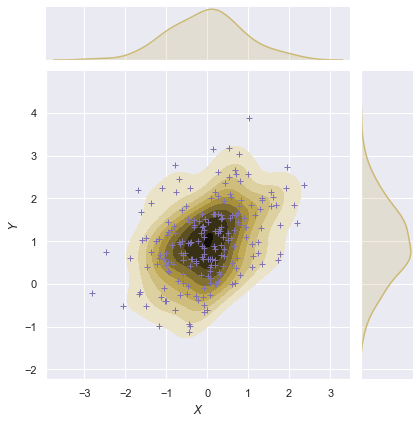

In [28]:
#   5.plot_joint和jointplot联合使用，同时画散点和二维kde
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

mean, cov = [0, 1], [(1, .5), (.5, 1)] 
data = np.random.multivariate_normal(mean, cov, 200) 
df = pd.DataFrame(data, columns=["x", "y"])

g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="y")
g.plot_joint(plt.scatter, c="m", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)  #画背景网格线
g.set_axis_labels("$X$", "$Y$")

# 笔记：
- 第一点：有多个特征，分析各个特征之间的关系，散点图； 
- 第二点：单个特征之间的关系：直方图，
- 第三点：用seaborn.pairplot(),直接将数据传进去，就会自动画出这些图

In [33]:
# 把数据集加载进来用函数load_dataset() 函数，
# iris = sns.load_dataset('iris')
# sns.pairplot(iris)

# 回归分析绘图

In [3]:
import numpy as np
import pandas as pd
# 导入seaborn 包
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 设定颜色
sns.set(color_codes = True)
np.random.seed(sum(map(ord,'regression')))

# tips 是seaborn 内置的数据集，用load_dataset： 加载进来；
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


regplot() 和lmplot()都可以绘制回归关系，推荐regplot()

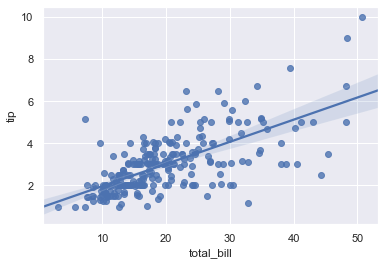

In [4]:
# 把x,y轴的要查看的指标传进来，传进来数据

sns.regplot(x = 'total_bill',y = 'tip',data = tips)

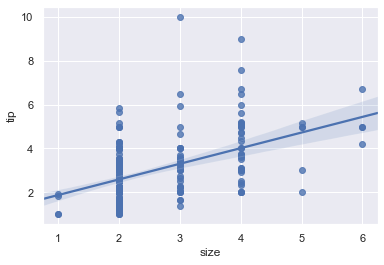

In [5]:
# 对类别进行回归分析
# size都为整数，不太适合做回归分析，可以在值上加上小的一些抖动:x_jitter = .35
sns.regplot(data = tips,x = 'size',y = 'tip')

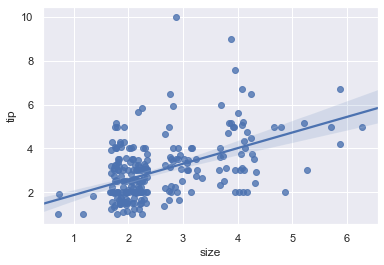

In [6]:
sns.regplot(x = 'size',y = 'tip',data = tips,x_jitter = .35)

#  多变量分析绘图
笔记：
- 第一点：对于类别值怎么进行可视化的展示

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

sns.set(style = "whitegrid",color_codes = True)

np.random.seed(sum(map(ord,"categorical")))
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

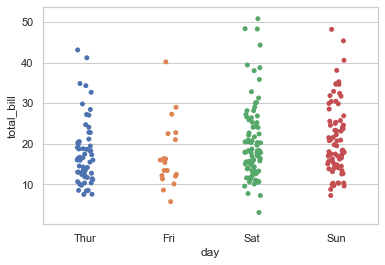

In [11]:
# # 重叠时，可以加上x_jitter = .35进行一些数据的偏移：jitter = True
# sns.stripplot(x = 'day',y = 'total_bill',data = tips,x_jitter = .35);
sns.stripplot(x = 'day',y = 'total_bill',data = tips,jitter = True);

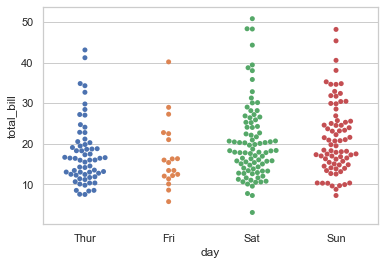

In [12]:
# 树形展示数据

sns.swarmplot(x = 'day',y = "total_bill",data = tips)

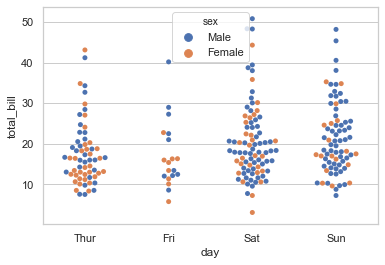

In [13]:
# 还可以加上个属性：hue，在画回归时

sns.swarmplot(x = 'day',y = "total_bill",hue = 'sex',data = tips)

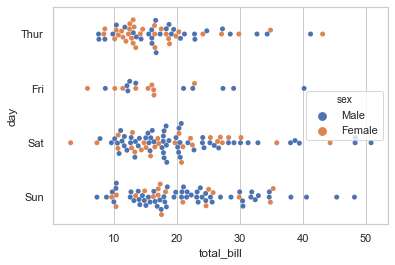

In [14]:

sns.swarmplot(y = 'day',x = "total_bill",hue = 'sex',data = tips)

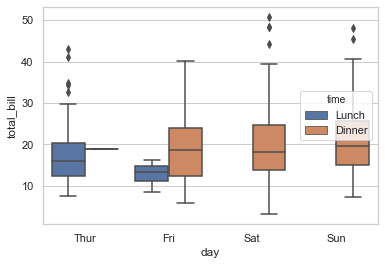

In [16]:
# 盒图: 统计离群点的个数

sns.boxplot(x = 'day',y = "total_bill",hue = 'time',data = tips)

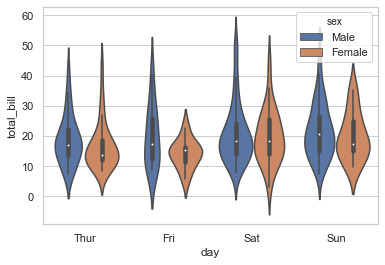

In [17]:

sns.violinplot(x = 'day',y = "total_bill",hue = 'sex',data = tips)

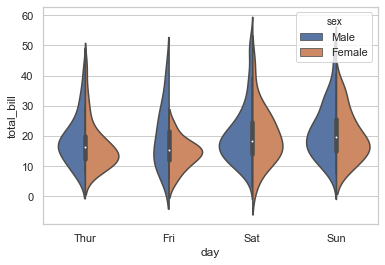

In [18]:
# ,split =True, 指定不同属性的差别
sns.violinplot(x = 'day',y = "total_bill",hue = 'sex',data = tips,split =True)